# **Part 2: Ionization**

**Goals:**

*   Determine Hg ionization energy.


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.optimize import curve_fit

**Reading the datasets**

In [17]:
# T = 50ºC

t50 = np.loadtxt('Data\Ionization\ion-T50-VA16-G90.txt')
dft50 = pd.DataFrame(t50, columns=['VA', 'Current (a.u.)', 'Temperature (ºC)'])

# T = 70ºC

t70 = np.loadtxt('Data\Ionization\ion-T70-VA16-G90.txt')
dft70 = pd.DataFrame(t70, columns=['VA', 'Current (a.u.)', 'Temperature (ºC)'])

# T = 90ºC

t90 = np.loadtxt('Data\Ionization\ion-T90-VA16-G90.txt')
dft90 = pd.DataFrame(t90, columns=['VA', 'Current (a.u.)', 'Temperature (ºC)'])

**Plotting**

In [46]:
fig50 = px.scatter(dft50,x='VA',y='Current (a.u.)')
fig70 = px.scatter(dft70,x='VA',y='Current (a.u.)')
fig90 = px.scatter(dft90,x='VA',y='Current (a.u.)')

fig90

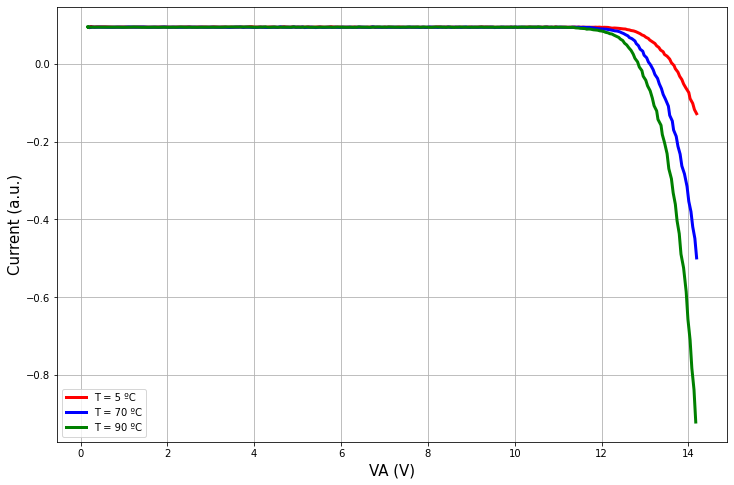

In [42]:
plt.figure(figsize=(12,8))
plt.plot(dft50['VA'], dft50['Current (a.u.)'], color='red', lw=3, label ='T = 5 ºC')
plt.plot(dft70['VA'], dft70['Current (a.u.)'], color='blue', lw=3, label = 'T = 70 ºC')
plt.plot(dft90['VA'], dft90['Current (a.u.)'], color='green', lw=3, label = 'T = 90 ºC')
plt.ylabel('Current (a.u.)', fontsize=15)
plt.xlabel('VA (V)', fontsize=15)
plt.grid()
plt.legend();

To calculate the ionization energy first it is going to be found the voltage in which the curve beggins to decrease. From this value it is going to be subtracted the contact potencial and that is the ionization energy. The contact pontencial to be used is the one calculate from method 1 in the first part. 

**The contact potencial from method 1 - part 1:**

In [39]:
df_cont_pot = pd.DataFrame({'V_cont': [1.0, 1.09, 1.2, 1.7, 2.2, 2.5, 7.0, 2.29, 5.0], 
                         'sigma V_cont': [0.3, 0.07, 0.1, 0.2, 0.2, 0.2, 0.2, 0.05, 0.8]})

V_cont = df_cont_pot['V_cont'].mean()
sigma_V_cont = df_cont_pot['sigma V_cont'].mean()

print('The contact potencial is', V_cont, '+/-', sigma_V_cont)

The contact potencial is 2.6644444444444444 +/- 0.23555555555555557


**Ionization Energy**

In [53]:
I50 = 13.67 - V_cont
I70 = 13.13 - V_cont
I90 = 12.87 - V_cont

I = np.array([I50,I70,I90]).mean()
I

10.55888888888889

In [55]:
# Percentage deviation

d = (abs(10.5589 - 10.4375)/(10.5589))*100
d

1.1497409768062916